# Bank credit scoring

In this project, I will develop a Machine Learning model to help a bank decides if a **loan** should be granted or not using a supervised learning method using classification.
This is the **pipeline** used for this project:                         
>
**1.    Business understanding**
>
**2.    Data collection & understanding**
>
**3.    Data cleaning**
>
**4.    EDA - Exploratory Data Analysis**
>
**5.    Data pre-processing**
>
**6.    Modelling**
>
**7.    Evaluation**
>
**8.    Deployment**
>

 In this actual notebook, i will perform the steps 1-4, more focused on **Exploratory Data Analysis(EDA)**. In the other notebook I will work on steps 5-8 mode focused in **modelling**.
 
 - The main objective here is to understanding our dataset and get some insights about it. From there, we will have some understanding about our actual situation and what we should perform in the Dataset

## 1.0   -   Business Understanding

Follow this official description at the competition on [Kaggle](https://www.kaggle.com/c/GiveMeSomeCredit):  
>
"Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 
Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years. "
- **1.1 Problem context**
-   Imagine you are a bank owner that recently opened this business. Among other banking problems (such as a management system, security system, etc.), you notice that your bank is offering loans to people who are not paying their debts properly.
In addition, employees are offering them credit limits that are far above normal when compared to their monthly income. 
So, you decide to hire a general team of Data Scientists/Machine learning who are offering a credit analysis system to decide if a loan should be granted or not. So, for now, you are the bank owner and I'm in the development team :). My team's task is to develop a model from the provided dataset and send it to another team to link the system itself to the model
- **Project objectives:**
- Build a model that has satisfactory accuracy in whether or not to offer loans correctly to customers
- Offer plans for the bank to reduce the 

In [2]:
import matplotlib.pyplot as plt # type: ignore
import  numpy as np# type: ignore
import  pandas as pd# type: ignore
import os
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.preprocessing import normalize# type: ignore
from sklearn.ensemble import RandomForestClassifier# type: ignore
from sklearn.metrics import accuracy_score# type: ignore
from sklearn.neighbors import KNeighborsClassifier# type: ignore
from sklearn import metrics# type: ignore
import seaborn as sns# type: ignore

from imblearn.over_sampling import RandomOverSampler# type: ignore
import random
import tensorflow as tf# type: ignore

sns.set_theme(style="ticks")
sns.set_palette("viridis")
sns.color_palette('viridis')

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

## *2.0*  Data Collection & understanding

In [8]:
df_data= pd.read_csv(os.path.join('..','data', 'cs-training.csv'))
df_data.head()


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


#### Data dictionary:
-  **SeriousDlqin2yrs** : Person experienced 90 days past due delinquency or worse 
-  **RevolvingUtilizationOfUnsecuredLines** : 	Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
-  **Age**:	Age of borrower in years
-  **NumberOfTime30-59DaysPastDueNotWorse**: (discarded):	Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
-  **DebtRatio**:	Monthly debt payments, alimony,living costs divided by monthy gross income
-  **MonthlyIncome**:	Monthly income
-  **NumberOfOpenCreditLinesAndLoans**:	Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
-  **NumberOfTimes90DaysLate**:	Number of times borrower has been 90 days or more past due.
-  **NumberRealEstateLoansOrLines**:	Number of mortgage and real estate loans including home equity lines of credit
-  **NumberOfTime60-89DaysPastDueNotWorse**:	Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
-  **NumberOfDependents**:	Number of dependents in family excluding themselves (spouse, children etc.)

In [9]:
df_data.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


###  Data Types

In [10]:
df_data.info()      #note Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

### Check NA

In [11]:
df_data.isna().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

#### Check duplicates

In [12]:
df_data.duplicated().sum()

0

## 3.0 - DATA CLEANING

### 3.1 FEATURE ENGINEERING

> This specific dataset already has each feature almost properly categorized (in raw tasks we will hardly find datasets like this). Therefore, tasks with Label Encoder can already be found

In [13]:
df_data.rename(columns={"Unnamed: 0": "ID",
                          "RevolvingUtilizationOfUnsecuredLines": "balance_divided_creditlimit", 
                         "NumberOfTime60-89DaysPastDueNotWorse": "number_times_latepay60-89"}, inplace=True)



In [14]:
#dropping rows that contain NA values
df_data.dropna(inplace=True)

#### Outliers


In [15]:
df_data= df_data[df_data['age'] >=18 ]

df_data= df_data[df_data['NumberOfTime30-59DaysPastDueNotWorse']<96  ]

df_data= df_data[df_data['balance_divided_creditlimit']<=1]


Here are some decisions that I've made:
- Excluded the target column Y. Also excluded the column ID because pandas already includes it. The feature "NumberOfTime30-59DaysPastDueNotWorse" is excluded to test how the model is going to perform, avoiding multicollinearity (later cases we could use PCA for trying to avoid it)

####  SPLITTING THE DATA

In [16]:
# Defining X and Y
garbage_columns= ["ID","SeriousDlqin2yrs", "NumberOfTime30-59DaysPastDueNotWorse"]
X_train, X_test, y_train, y_test = train_test_split( df_data.drop(garbage_columns, axis=1), df_data["SeriousDlqin2yrs"], test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(93877, 9) (23470, 9) (93877,) (23470,)


In [17]:
X_train.head()

,balance_divided_creditlimit,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,number_times_latepay60-89,NumberOfDependents
95728,0.012414,36,0.004570,3500.0,6,0,0,0,0.0
10473,0.523462,47,0.569575,6395.0,11,0,1,0,2.0
115588,0.119932,74,0.028031,4387.0,14,0,0,0,0.0
8898,0.031554,32,0.032146,6625.0,3,0,0,0,0.0
144426,0.000000,43,0.148213,4000.0,7,0,0,0,2.0


In [18]:
X_train.iloc[:, 0][X_train.iloc[:, 0]<50]
def labeling(X):
    if X<15:
        return 0
    elif 30>X>=15:
        return 1
    elif 100>X>=30:
        return 2
    elif 200>X>=100:
        return 3
    else: 
        return 4
    
X_train['MonthlyIncome'].apply(labeling).value_counts()

4    92010
0     1800
3       51
2       13
1        3
Name: MonthlyIncome, dtype: int64

In [19]:
###############################################################
X_train['MonthlyIncome'].apply(lambda x: 0 if 0 <= x < 10000 else (1 if 10000 <= x < 20000 else (2 if 20000 <= x < 30000 else 3))).value_counts()


0    78227
1    13817
2     1160
3      673
Name: MonthlyIncome, dtype: int64

####  Checking the targets 

c:\Users\Erika Magalhães\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


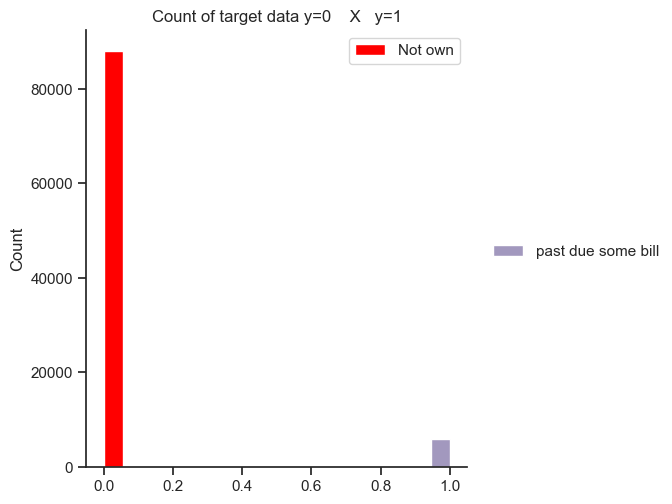

In [20]:
parta_data= pd.DataFrame({'past due some bill': y_train.values})
g= sns.displot(parta_data)
bars = g.ax.patches
bars[0].set_facecolor('red')
plt.legend(['Not own'])
plt.title('Count of target data y=0    X   y=1')

plt.show()


In [21]:
def overSampling(X, y):

    ros = RandomOverSampler(random_state=0)
    X_resampled, y_resampled = ros.fit_resample(X, y)
    
    return X_resampled, y_resampled



X_train, y_train = overSampling(X_train, y_train)
X_test, y_test= overSampling(X_test, y_test)

y_counts= y_train.value_counts()
resampledDf= pd.DataFrame({'CLASS 0': y_counts[0], 'CLASS 1': y_counts[1]}, index=['QUANTITY EACH CLASS'])
resampledDf

,CLASS 0,CLASS 1
QUANTITY EACH CLASS,88053,88053


## 4.0  EDA - Exploratory Data Analysis

#### 4.1   -   General plots

array([[<Axes: title={'center': 'balance_divided_creditlimit'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'DebtRatio'}>],
       [<Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'NumberOfOpenCreditLinesAndLoans'}>,
        <Axes: title={'center': 'NumberOfTimes90DaysLate'}>],
       [<Axes: title={'center': 'NumberRealEstateLoansOrLines'}>,
        <Axes: title={'center': 'number_times_latepay60-89'}>,
        <Axes: title={'center': 'NumberOfDependents'}>]], dtype=object)

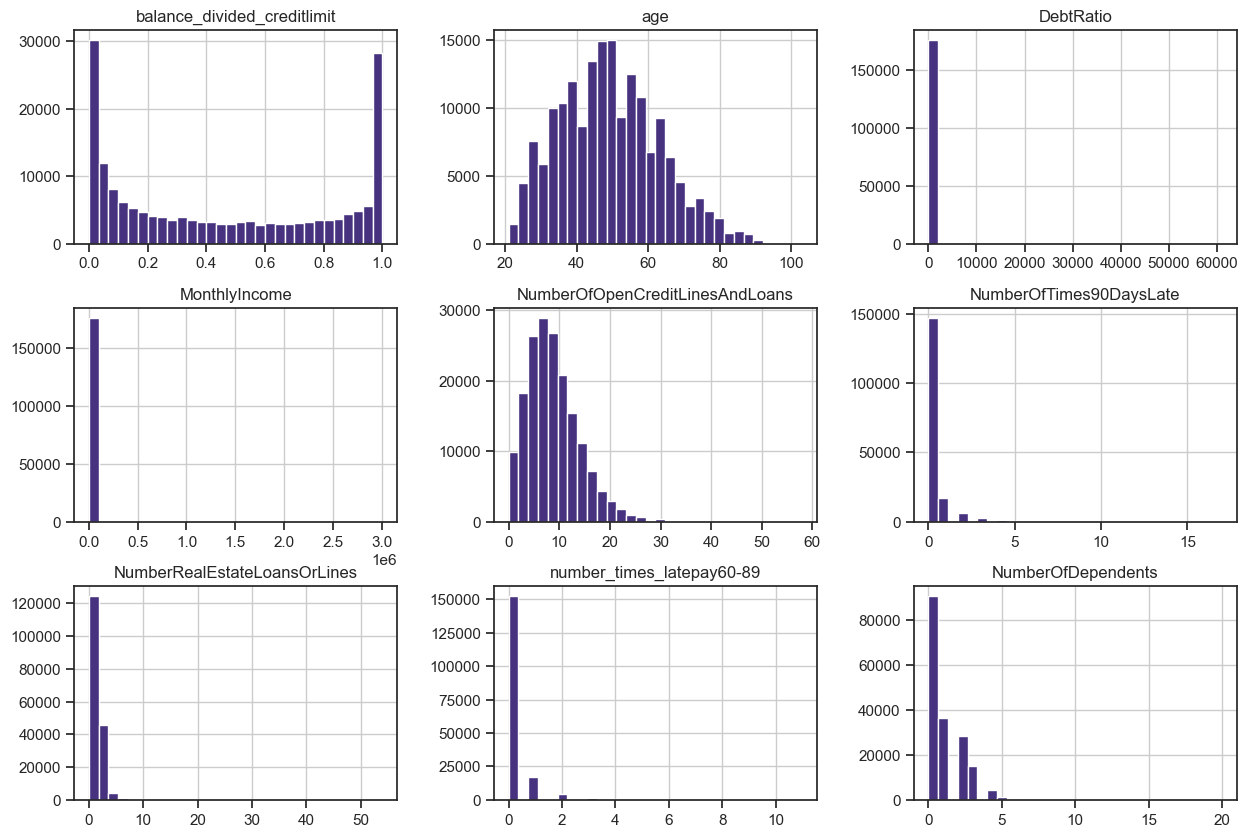

In [106]:
X_train[:].hist(figsize=(15,10), bins=30)

##### Informations we can extract from above:
- The dataset has some values that are extremely high comparing to the others (please check example below )
- Between 40-60 years old, we have the highest peak of people registration
- The most records of borrowers haven't been in past due situation in the last 2 years (60-89 days or 90+ )

In [107]:
pd.DataFrame(X_train['MonthlyIncome'].value_counts().sort_index())

#The first is the lowest record of monthly income and the last is the HIGHER

,count
MonthlyIncome,
0.0,1919
1.0,675
2.0,6
4.0,13
5.0,2
...,...
835040.0,1
1072500.0,1
1560100.0,1


#### 4.2 - Correlation heat map using Pearson method

<Axes: >

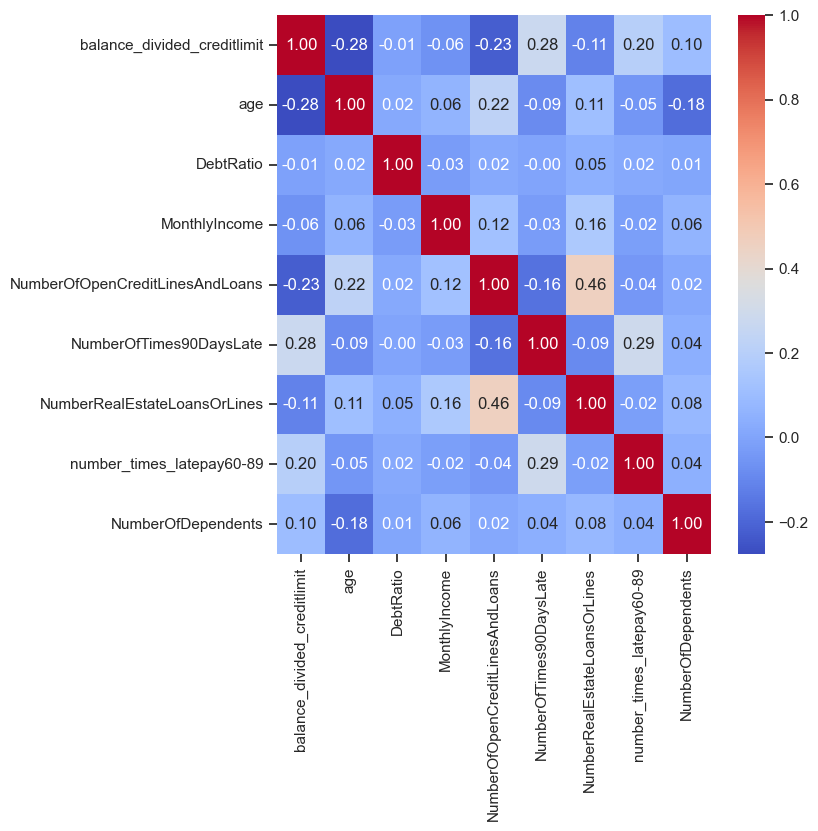

In [21]:
plt.figure(figsize=(7,7))
sns.heatmap(X_train.corr(method='pearson'), annot=True, cmap='coolwarm',  fmt='.2f')
#Detecting correlations

##### Here we can see some insights:
- NumberOfTimes90DaysLate has some correlation with number_times_latepay60-89 and you can understand this thinking that they are essentialy the same feature, but with different metrics (days related)
- The Age of the borrower have no correlation compared to the NumberOfDependents (-0.21)
- NumberRealEstateLoansOrLines have the greatest correlation in the heatmap while in pair with NumberOfOpenCreditLinesAndLoans

##### 4.2.1 Vizualizing sort of correlations betweeen features

Text(0.5, 1.0, 'Bad Correlation')

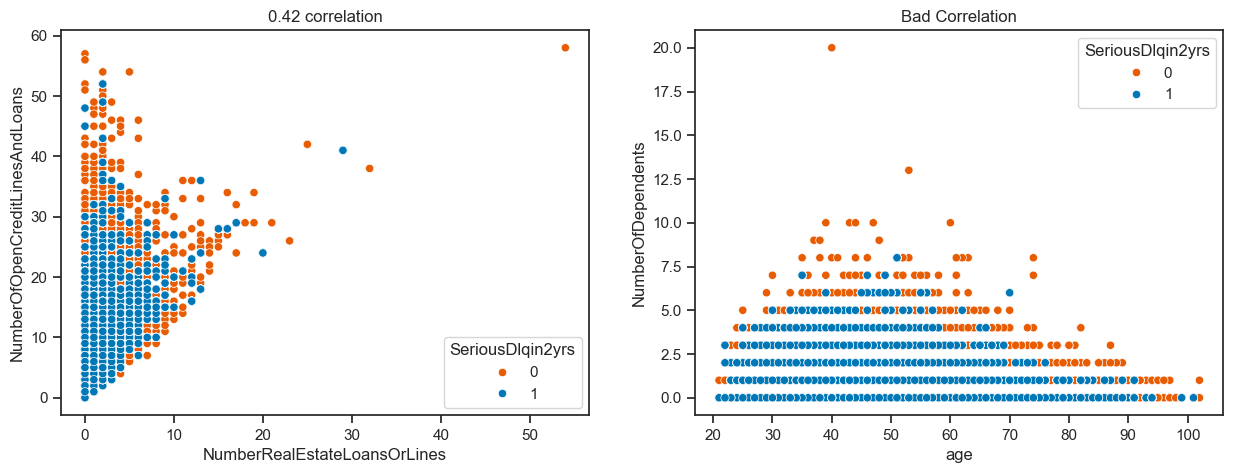

In [22]:
colors_bi = sns.color_palette(['#e85d04', '#0077b6'])
fig, axs =plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x=X_train['NumberRealEstateLoansOrLines'], y=X_train['NumberOfOpenCreditLinesAndLoans'],ax=axs[0], hue=y_train, palette=colors_bi)
axs[0].set_title('0.42 correlation')
sns.scatterplot(x=X_train['age'], y=X_train['NumberOfDependents'],ax=axs[1], hue=y_train, palette=colors_bi)
axs[1].set_title('Bad Correlation')


#### 4.3   -   Debt Ratio ㅤ       X       ㅤ Age


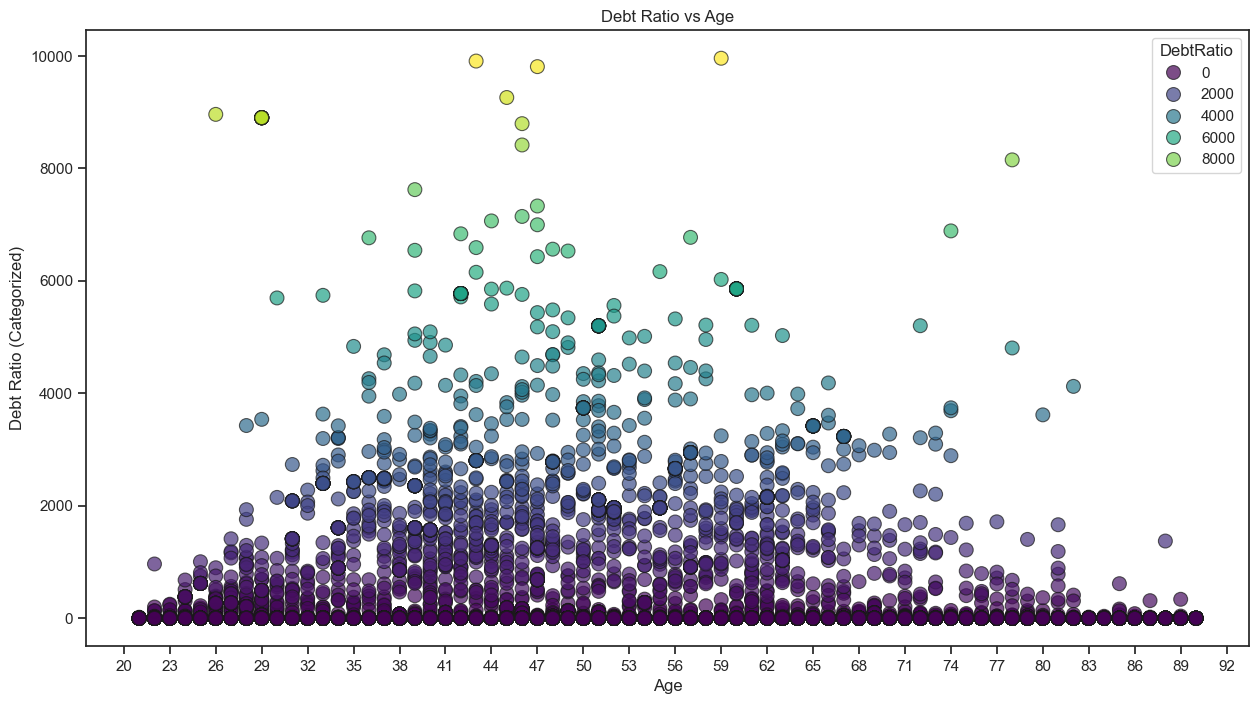

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def debtDivided(value):
    if value >= 0 and value < 25:
        return 0   
    if value >= 25.0 and value < 50.0:
        return 1
    elif value >= 50.0 and value < 100.0:
        return 2
    elif value >= 100 and value < 150.0:
        return 3
    elif value >= 150 and value < 200:
        return 4
    elif value >= 200 and value < 400:
        return 5
    else:
        return 6

# Aplicar a função debtDivided na coluna DebtRatio
particioned_data_2 = X_train.iloc[:, 2][X_train.iloc[:, 2] < 10000]

# Criar DataFrame com Age e DebtRatio categorizado
particioned_data_2 = pd.DataFrame(particioned_data_2)
particioned_data_2.columns = ['DebtRatio']
particioned_data_2['Age'] = X_train.iloc[:, 1]

# Filtrar por idade <= 90
particioned_data_2 = particioned_data_2[particioned_data_2['Age'] <= 90]  # Remover casos extremos para melhor visualização

# Plotar o gráfico
plt.figure(figsize=(15, 8))
sns.scatterplot(data=particioned_data_2, x='Age', y='DebtRatio', hue='DebtRatio', palette='viridis', alpha=0.7, s=100, edgecolor='k')

plt.xlabel('Age')
plt.ylabel('Debt Ratio (Categorized)')
plt.title('Debt Ratio vs Age')
plt.xticks(np.arange(20, 95, 3))
plt.show()


##### Description:
- The more higher the Debt Ratio gets, the more people are in debt.
- There is an excessive growth between the ages 23-25, 50-53, 80-83.
- The records are diverse and we have so much Low and High cases

#### 4.4       -       Past due    ㅤ    X   ㅤ    Number of dependents
-  Quantity of number of dependents of people that past due = 1  ㅤ   Xㅤ   past due = 0

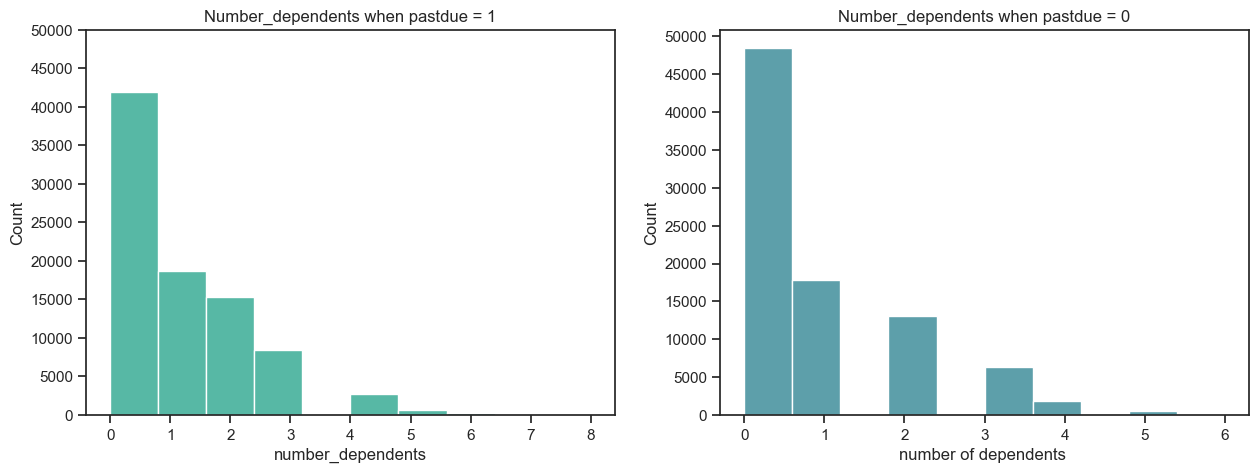

In [23]:
duedependents= pd.DataFrame()
due_to_0=      pd.DataFrame()
duedependents['number_dependents=1']= X_train.iloc[:, 8][y_train==1]
due_to_0['number_dependents_0']= X_train.iloc[:, 8][y_train==0]


colors = sns.color_palette('viridis')
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(duedependents['number_dependents=1'], ax=axs[0],bins=10, color=colors[3])
axs[0].set_xlabel('number_dependents')
axs[0].set_title('Number_dependents when pastdue = 1')
axs[0].set_yticks(np.arange(0,55000, 5000))

sns.histplot(due_to_0['number_dependents_0'], ax=axs[1], binrange=(0,6), bins=10, color=colors[2])
axs[1].set_xlabel('number of dependents ')
axs[1].set_title('Number_dependents when pastdue = 0')
axs[1].set_yticks(np.arange(0,55000, 5000))

##### Description:
- The most size of the record are with number dependents equals to **0**
- There is more people with 3 dependents when they are in debt (y=1)
- The most people with 0 dependents is when they Aren't in debt (y=0)


#### 4.5       Balance of credit limit ÷ sum of credit limit       ㅤX        ㅤPast due

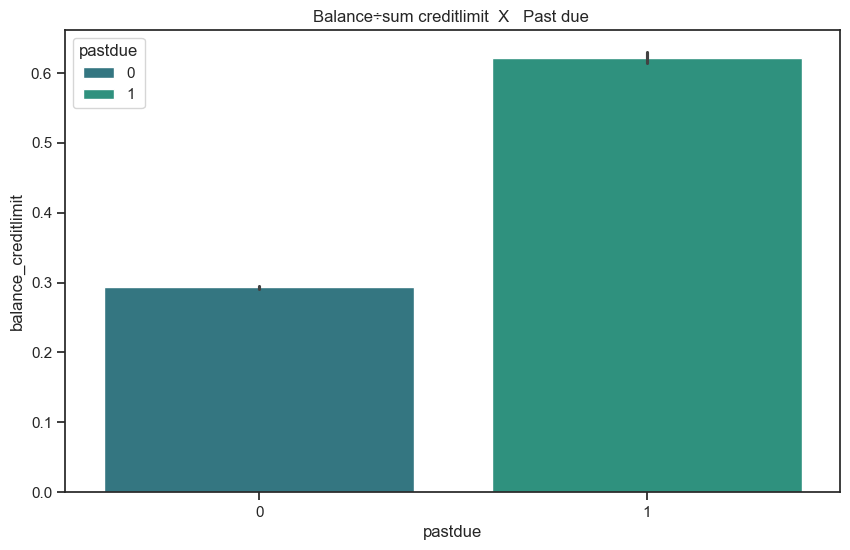

In [133]:
balancedue= pd.DataFrame()
balancedue['balance_creditlimit'] = df_data.iloc[:, 2]
balancedue['pastdue']= df_data.iloc[:, 1]
balancedue=balancedue.sort_index()


plt.figure(figsize=(10,6))
sns.barplot(balancedue, x='pastdue', y='balance_creditlimit', hue='pastdue', palette=colors[2:4])
plt.title('Balance÷sum creditlimit  X   Past due ')
plt.show()

##### Description:
- The chart compares the median revolving utilization of unsecured lines of credit between borrowers with past defaults (Y=1) and those without defaults (Y=0)
>
What that means?  The people who are with past due delinquency (y=0) have higher balance compared with the sum of the credit limit. This could be a reason:
 People with pastdue = 1 are active users of credit limit and they either could have higher credit limits or are owing payment over a long period of time. As a result, interest rates and rates are rising
>
So, from the division equation represented by this Feature, we have that the denominator has to be > 0 and > Total Balance. 
>
- As the TotalBalance decrease, the overall value are getting down until 0 (no balance available)
> 
- Conversely, as the TotalBalance increases, the overall value also increases until it reaches the value of the denominator. PS: you can't have more than what is available in your account
>
$$
\frac{Total Balance}{Sum Of Credit Limits}
$$



### 4.6   -    Number of times people past due in last 2 years      ㅤX          ㅤCurrently has bills that are at least 90 days past due


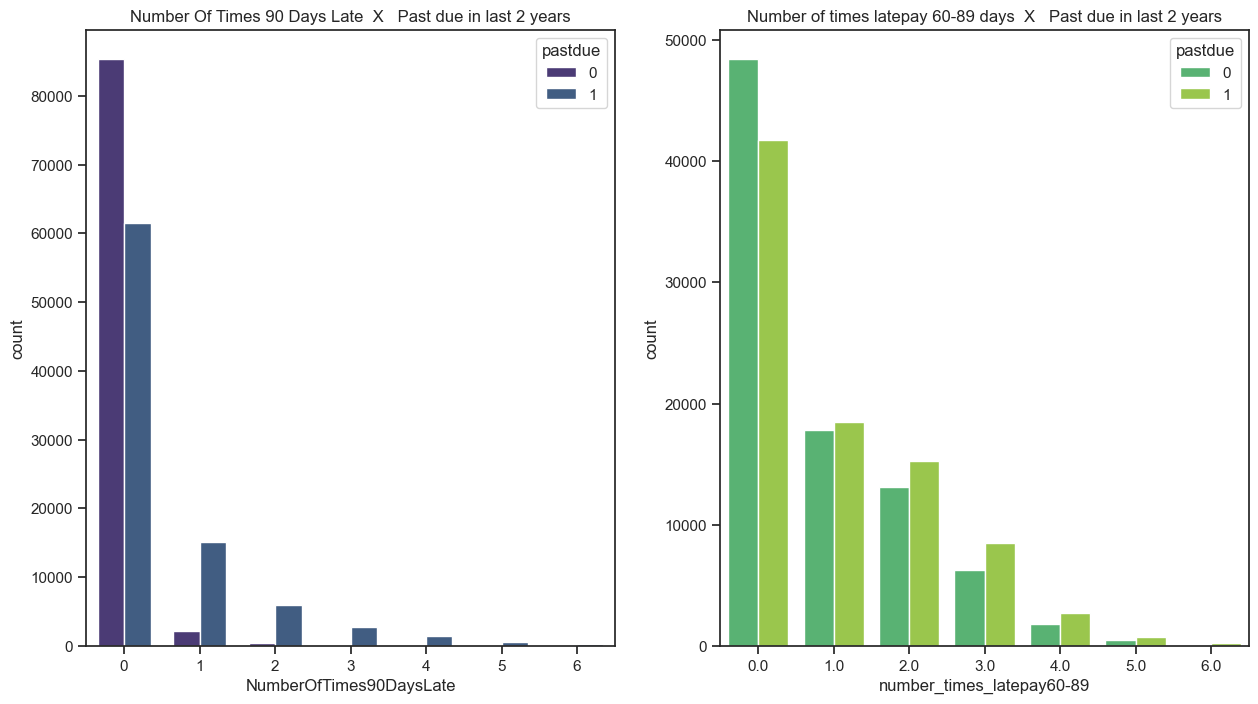

In [24]:

df_recurring= pd.DataFrame()
df_recurring['NumberOfTimes90DaysLate']= X_train['NumberOfTimes90DaysLate'][X_train['NumberOfTimes90DaysLate']<7]
df_recurring['pastdue']= y_train
df_recurring['number_times_latepay60-89']= X_train.iloc[:, 8][X_train.iloc[:, 8]<7]

fig, axs = plt.subplots(1, 2, figsize=(15, 8))
ax1= sns.countplot(df_recurring, x='NumberOfTimes90DaysLate', ax= axs[0], hue='pastdue', palette=colors[:2], width=0.7)
axs[0].set_title('Number Of Times 90 Days Late  X   Past due in last 2 years')
axs[0].set_xticks(np.arange(0,7, 1))
sns.countplot(df_recurring, x='number_times_latepay60-89', ax= axs[1], hue='pastdue', palette=colors[4:], width=0.8)
axs[1].set_title('Number of times latepay 60-89 days  X   Past due in last 2 years')



plt.show()

##### Description:
- This chart shows the number of times which a people had an overdue bills for 90+/60-89 days in the last 2 years, separated for acctually has a overdue bills or not
>
- This is very valuable information, as we can see that borrowers who have overdue bills have had bills that are 60 days or more past due **in the last 2 years**. 
- The majority of the records of each graph when set to 0 (none times in the last two years) acctually haven't any overdue bills


#### 4.7   -    Have people who have income less than 5000 owed any bills that has been expired for at least 90 days in the last two years?     


Rectangle(xy=(-0.4, 0), width=0.8, height=52932, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=43025, angle=0)


C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_6804\4055051692.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  notpast=X_train[X_train['MonthlyIncome']<5400][y_train==0].shape[0]
C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_6804\4055051692.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  past=X_train[X_train['MonthlyIncome']<5400][y_train==1].shape[0]


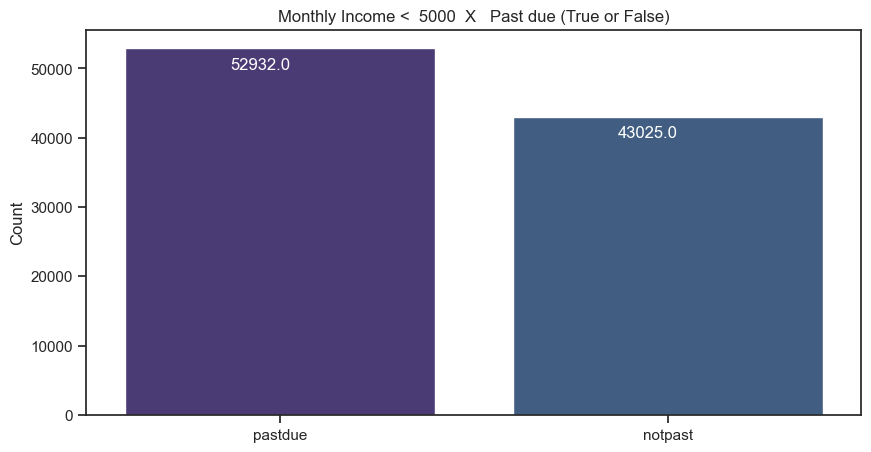

In [83]:

notpast=X_train[X_train['MonthlyIncome']<5400][y_train==0].shape[0]
past=X_train[X_train['MonthlyIncome']<5400][y_train==1].shape[0]
income_past= pd.DataFrame({'pastdue': past, 'notpast': notpast}, index=['quantity'])
plt.figure(figsize=(10,5))
ax1= sns.barplot(income_past)

for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()- 3000), ha='center', color='w')
    print(p)
plt.title('Monthly Income <  5000  X   Past due (True or False)')
plt.ylabel('Count')

plt.show()


##### Description:
- This chart shows the countage of people who have income < 5000 when past due = 1 or = 0 (y=1 or y=0)
- There are more people that are in debt when comparing their income < 5000

#### 4.8   -    Pastdue X  age     


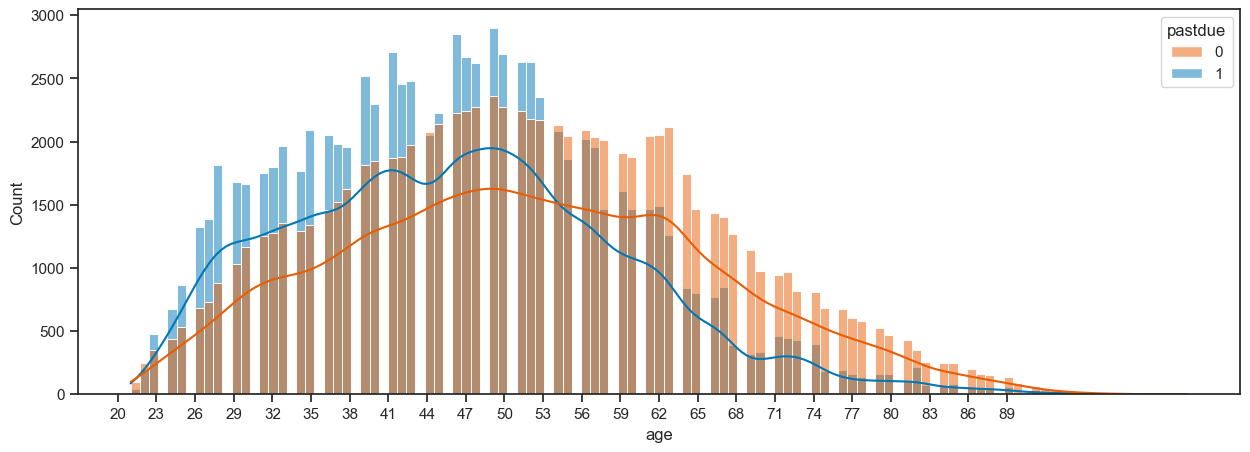

In [129]:
df_age = pd.DataFrame({'age': X_train['age']}) 
df_age['pastdue'] = y_train.explode() 
plt.figure(figsize=(15,5))
sns.histplot(data=df_age, x="age", hue="pastdue", palette=colors_bi, kde=True)
plt.xticks(np.arange(20,90,3))
plt.show()

##### Description:
- The number of borrowers is higher between 39-49 years old when they have any overdue bills
- Aproximately, after the 63 years old, we have a decrease of the number or records as well  as the number of people who have overdue bills
- Conversely, before 55 years old, the majority of the records are in people who have any overdue bills (y=1)

# Final insights
- Younger people appear to have less free money than olders one, this means that they have more monthly payments than the others. So the bank's system should be "aware" while giving credit limit to them.  
- The most part of people who haven't any overdue bills have 0 dependents. Maybe people with less dependents have less monthly payments
- People with past due bills have seems to have higher credit limits (maybe for being actively users)
- Most people who are currently overdue have been overdue at least 1 time, overdue for more than 60+ days in the last two years, you can see the calculation of the percentage of the first graph of 4.6 (in the times= 1) in the next cell
- A person who experencied Past due in the last 2 years **probably** will experience again
- When comparing people with income <5000, the majority borrowers currently are with past due bills
- This dataset has a format in which it has values that vary a lot in almost all features, in other types of analyses, you may find other data treatments by editing this

In [60]:
val_past=(df_recurring['NumberOfTimes90DaysLate'][df_recurring['NumberOfTimes90DaysLate']==1][df_recurring['pastdue']==1].count()/df_recurring.groupby('NumberOfTimes90DaysLate')['pastdue'].count()[1])*100

val_notpast=(df_recurring['NumberOfTimes90DaysLate'][df_recurring['NumberOfTimes90DaysLate']==1][df_recurring['pastdue']==0].count()/df_recurring.groupby('NumberOfTimes90DaysLate')['pastdue'].count()[1])*100

pd.DataFrame([f'{val_past:.1f}'+'%', f'{val_notpast:.2f}'+'%' ], columns=['Percentage'], index=['Past due = True', 'Past due = False'])


,Percentage
Past due = True,87.6%
Past due = False,12.36%
